# UCL 2021-22 | Players Data

Ссылка на датасет: https://www.kaggle.com/datasets/azminetoushikwasi/ucl-202122-uefa-champions-league?resource=download&select=attempts.csv

Описание: This dataset contains all the player stats of UEFA Champions League season 2021-22.

# Переменные
- serial порядковый номер таблицы;
- player_name имя игрока;
- club название клуба игрока;
- position позиция игрока клуба на поле;
- total_attempts общее количество попыток забить мяч в ворота противника;
- on_target количество мячей, забитых в створ ворот противника (успешные попытки забить гол);
- off_target количество ударов мимо створа ворот противника (неудачные попытки забить гол);
- blocked количество отбитых ударов в створ ворот;
- match_played количество сыгранных матчей в команде.

# Импортируем все необходимые библиотеки

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import markdown 
import scipy.stats
import warnings
from matplotlib import pyplot as plt
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.4f}'.format

# Импортируем датасет

In [4]:
uefa=pd.read_csv('Desktop/UCL 2021-22 | Players Data/attempts.csv')
print(uefa.shape)
uefa.head()

(546, 9)


,serial,player_name,club,position,total_attempts,on_target,off_target,blocked,match_played
0,1,Benzema,Real Madrid,Forward,45,23,13,9,12
1,2,Salah,Liverpool,Forward,42,22,11,9,13
2,3,Mahrez,Man. City,Midfielder,37,18,8,11,12
3,4,Sané,Bayern,Midfielder,33,13,12,8,10
4,5,Lewandowski,Bayern,Forward,31,19,8,4,10


# Первичный анализ

проведем первичный анализ данных о датасете (df.info() и посмотрим базовые метрики (df.describe())

In [10]:
uefa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   serial          546 non-null    int64 
 1   player_name     546 non-null    object
 2   club            546 non-null    object
 3   position        546 non-null    object
 4   total_attempts  546 non-null    int64 
 5   on_target       546 non-null    int64 
 6   off_target      546 non-null    int64 
 7   blocked         546 non-null    int64 
 8   match_played    546 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 38.5+ KB


In [11]:
uefa.describe()

,serial,total_attempts,on_target,off_target,blocked,match_played
count,546.0000,546.0000,546.0000,546.0000,546.0000,546.0000
mean,244.1447,5.6538,1.9670,2.2418,1.4451,5.7491
std,138.2398,6.1195,2.9502,2.3020,1.8958,2.5119
min,1.0000,1.0000,0.0000,0.0000,0.0000,1.0000
25%,130.0000,2.0000,0.0000,1.0000,0.0000,4.0000
50%,219.0000,4.0000,1.0000,1.0000,1.0000,6.0000
75%,347.0000,7.0000,2.0000,3.0000,2.0000,7.0000
max,440.0000,45.0000,23.0000,13.0000,11.0000,13.0000


отсортируем данные по признаку "попали в цель" (т.е. попали в ворота -  on target)

In [15]:
uefa.sort_values(by='on_target', ascending=False)

,serial,player_name,club,position,total_attempts,on_target,off_target,blocked,match_played
0,1,Benzema,Real Madrid,Forward,45,23,13,9,12
1,2,Salah,Liverpool,Forward,42,22,11,9,13
4,5,Lewandowski,Bayern,Forward,31,19,8,4,10
2,3,Mahrez,Man. City,Midfielder,37,18,8,11,12
7,8,Mbappé,Paris,Forward,27,16,6,5,8
...,...,...,...,...,...,...,...,...,...
404,347,Bornauw,Wolfsburg,Defender,2,0,2,0,3
405,347,Waldschmidt,Wolfsburg,Forward,2,0,2,0,3
406,347,D'Ambrosio,Inter,Defender,2,0,2,0,3
407,347,Bondarenko,Shakhtar Donetsk,Midfielder,2,0,2,0,2


*по результатам мы видим, что в пятерку самых результативных по количеству попаданий мячей в цель (створ ворот) входят такие футболисты, как Бензема, Салах, Левандовски, Марэз и Мбаппэ*

выведем уникальные значения поля "on_target"

In [16]:
uefa['on_target'].unique()

array([23, 22, 18, 13, 19, 11,  7, 16,  8, 10, 14, 12, 15,  9,  6,  3,  5,
        4,  2,  1,  0])

посмотрим, количество попыток забить гол в разрезе полевых позиций игроков

In [18]:
uefa['position'].value_counts()

Midfielder    233
Defender      177
Forward       136
Name: position, dtype: int64

*как мы видим, самое большое количество забитых мячей у полузащитников (midfielder)*

определим топ-5 самых результативных клубов в разрезе позиций игроков по количеству забитых мячей

In [24]:
short_uefa = uefa[['club', 'position', 'on_target']]
short_uefa[short_uefa.groupby('on_target')['club'].transform(max) == short_uefa['club']]

,club,position,on_target
0,Real Madrid,Forward,23
1,Liverpool,Forward,22
2,Man. City,Midfielder,18
3,Bayern,Midfielder,13
4,Bayern,Forward,19
5,Porto,Forward,11
7,Paris,Forward,16
12,Villarreal,Midfielder,14
15,Ajax,Forward,15
18,Man. United,Forward,12


*самые результативные клубы - Риал Мадрид, Ливерпуль, Манчестер Сити, Бавария, Порто*

найдем среднее количество забитых голов у всех клубов лиги

In [28]:
club_score=uefa.groupby('club')['on_target'].mean()
club_score

club
Ajax               3.0588
Atalanta           1.8750
Atlético           1.5000
Barcelona          0.5500
Bayern             4.1176
Benfica            1.9444
Beşiktaş           0.8000
Chelsea            2.7143
Club Brugge        1.8462
Dortmund           1.6111
Dynamo Kyiv        1.2308
Inter              2.2222
Juventus           2.1765
LOSC               1.2941
Leipzig            2.1250
Liverpool          3.7000
Malmö              0.5833
Man. City          3.5789
Man. United        1.9048
Milan              0.8421
Paris              2.7857
Porto              1.5625
Real Madrid        3.8333
Salzburg           2.4667
Sevilla            1.4375
Shakhtar Donetsk   1.1053
Sheriff            1.4286
Sporting CP        1.7222
Villarreal         2.3684
Wolfsburg          0.7333
Young Boys         1.3158
Zenit              1.5000
Name: on_target, dtype: float64

In [29]:
club_score.sort_values(ascending=False)

club
Bayern             4.1176
Real Madrid        3.8333
Liverpool          3.7000
Man. City          3.5789
Ajax               3.0588
Paris              2.7857
Chelsea            2.7143
Salzburg           2.4667
Villarreal         2.3684
Inter              2.2222
Juventus           2.1765
Leipzig            2.1250
Benfica            1.9444
Man. United        1.9048
Atalanta           1.8750
Club Brugge        1.8462
Sporting CP        1.7222
Dortmund           1.6111
Porto              1.5625
Zenit              1.5000
Atlético           1.5000
Sevilla            1.4375
Sheriff            1.4286
Young Boys         1.3158
LOSC               1.2941
Dynamo Kyiv        1.2308
Shakhtar Donetsk   1.1053
Milan              0.8421
Beşiktaş           0.8000
Wolfsburg          0.7333
Malmö              0.5833
Barcelona          0.5500
Name: on_target, dtype: float64

*вывод- топ-5 клубов с наибольшим средним числом голов - Бавария, Риал Мадрид, Ливерпуль, Манчестер Сити, Аякс*

построим график для иллюстрации статистики средних голов клубов в лиге

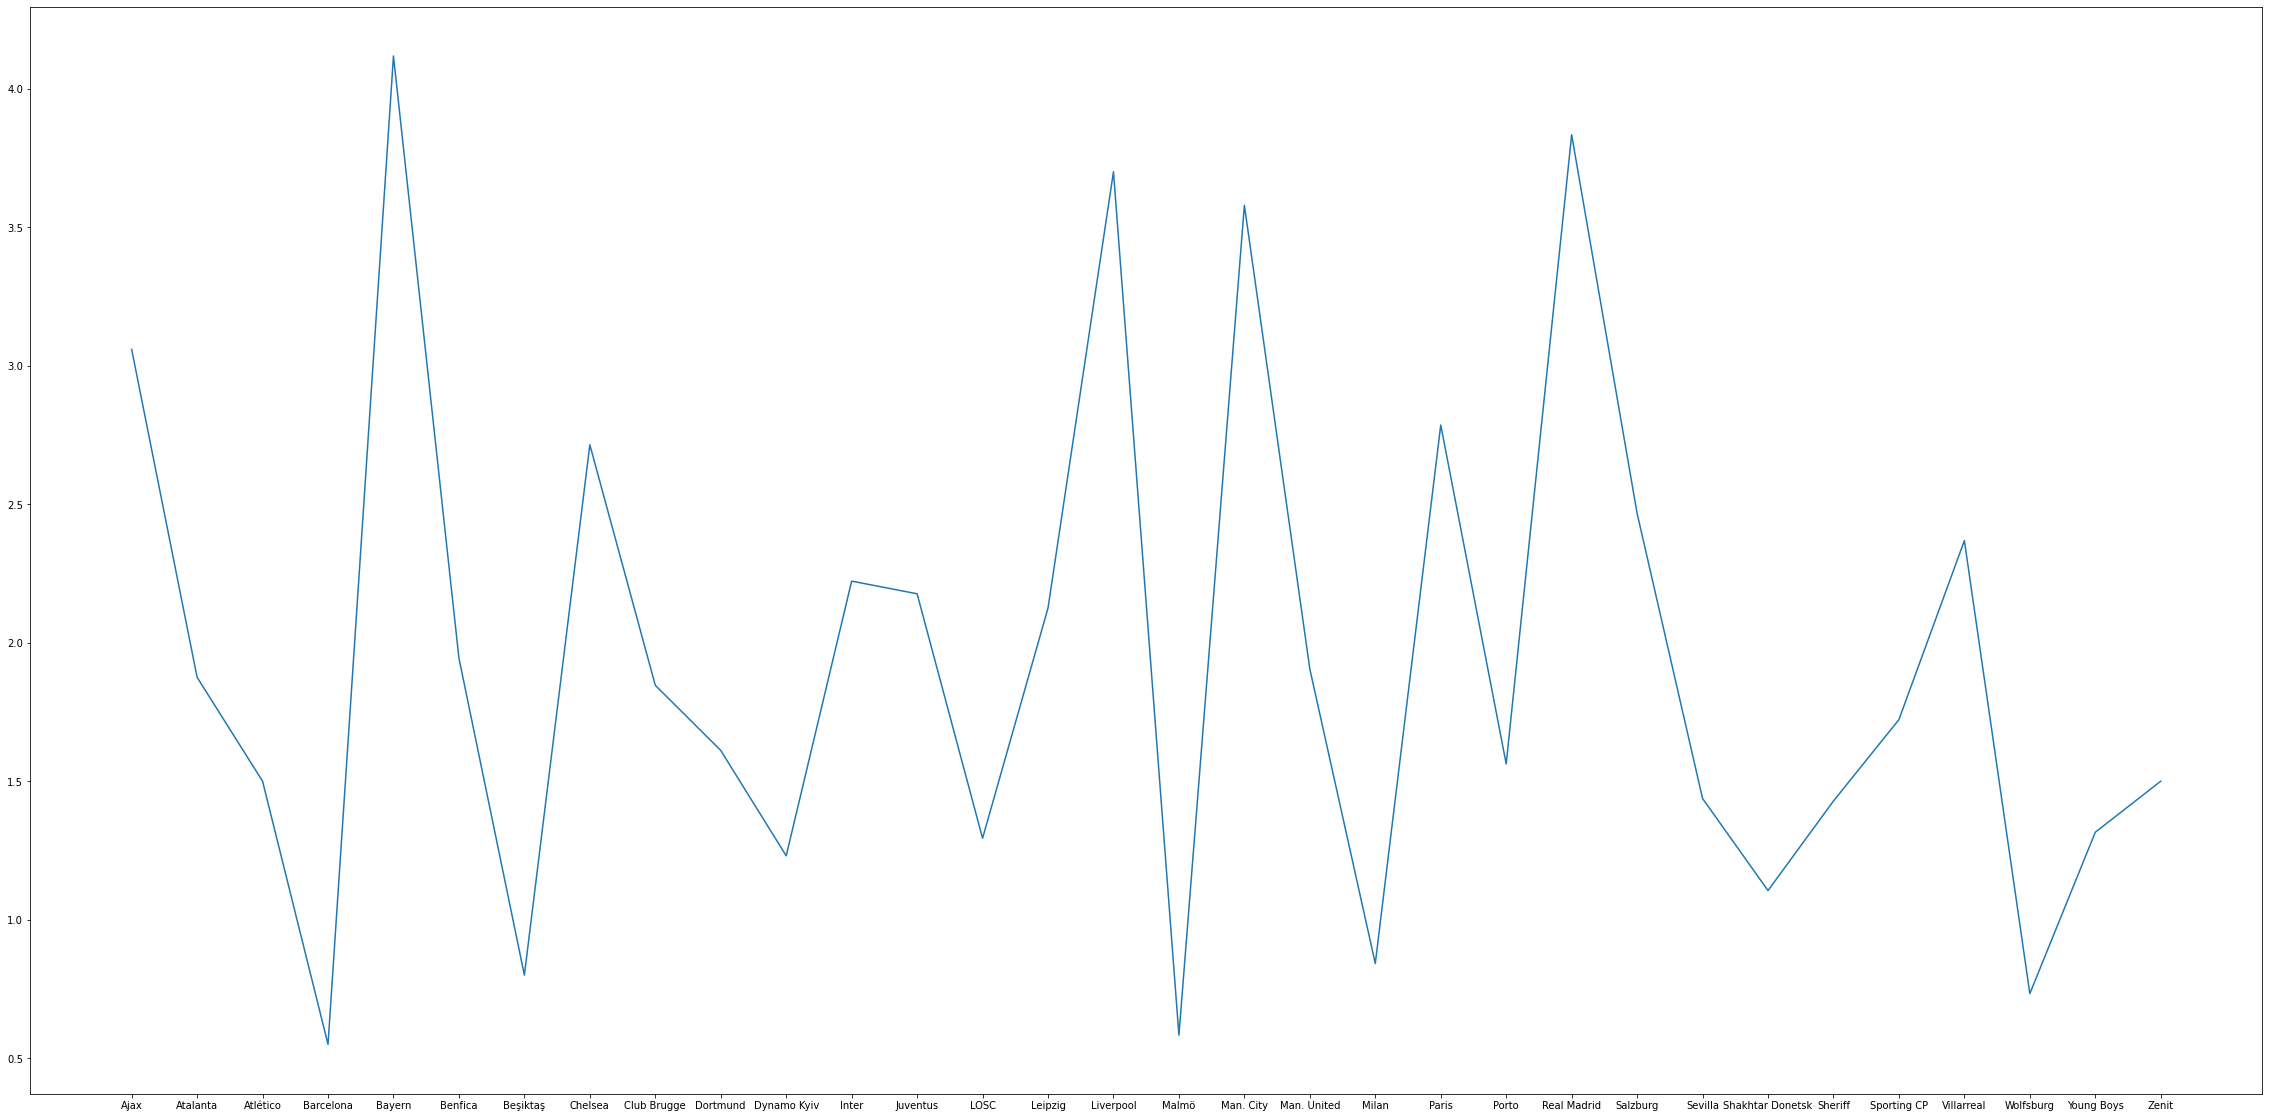

In [71]:
fig, ax = plt.subplots(figsize=(40,20))
ax.plot(club_score)

<AxesSubplot:>

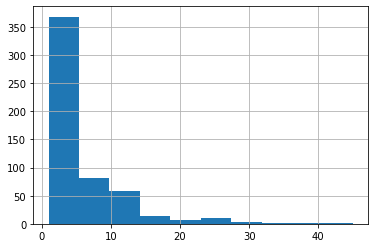

In [72]:
uefa['total_attempts'].hist()

In [48]:
uefa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   serial          546 non-null    int64 
 1   player_name     546 non-null    object
 2   club            546 non-null    object
 3   position        546 non-null    object
 4   total_attempts  546 non-null    int64 
 5   on_target       546 non-null    int64 
 6   off_target      546 non-null    int64 
 7   blocked         546 non-null    int64 
 8   match_played    546 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 38.5+ KB


отсортируем игроков клуба Риал Мадрид

In [73]:
rm=uefa[uefa['club']=='Real Madrid']
rm

,serial,player_name,club,position,total_attempts,on_target,off_target,blocked,match_played
0,1,Benzema,Real Madrid,Forward,45,23,13,9,12
8,8,Vinícius Júnior,Real Madrid,Forward,27,8,10,9,13
17,18,Rodrygo,Real Madrid,Forward,23,10,7,6,11
40,40,Modrić,Real Madrid,Midfielder,14,5,3,6,13
52,52,Kroos,Real Madrid,Midfielder,12,7,1,4,12
91,80,Casemiro,Real Madrid,Midfielder,10,2,6,2,11
99,98,Éder Militão,Real Madrid,Defender,9,4,5,0,12
111,98,Valverde,Real Madrid,Midfielder,9,0,4,5,11
183,179,Asensio,Real Madrid,Forward,5,3,0,2,8
184,179,Carvajal,Real Madrid,Defender,5,2,3,0,11


рассчитаем процент попаданий каждого игрока клуба Риал Мадрид в створ ворот из числа всех попыток

In [82]:
rm['percent_on_target']=rm['on_target']/rm['total_attempts']*100
rm

,serial,player_name,club,position,total_attempts,on_target,off_target,blocked,match_played,percent_on_target
0,1,Benzema,Real Madrid,Forward,45,23,13,9,12,51.1111
8,8,Vinícius Júnior,Real Madrid,Forward,27,8,10,9,13,29.6296
17,18,Rodrygo,Real Madrid,Forward,23,10,7,6,11,43.4783
40,40,Modrić,Real Madrid,Midfielder,14,5,3,6,13,35.7143
52,52,Kroos,Real Madrid,Midfielder,12,7,1,4,12,58.3333
91,80,Casemiro,Real Madrid,Midfielder,10,2,6,2,11,20.0000
99,98,Éder Militão,Real Madrid,Defender,9,4,5,0,12,44.4444
111,98,Valverde,Real Madrid,Midfielder,9,0,4,5,11,0.0000
183,179,Asensio,Real Madrid,Forward,5,3,0,2,8,60.0000
184,179,Carvajal,Real Madrid,Defender,5,2,3,0,11,40.0000


*наибольший попаданий процент из всех игроков клуба имеют Азар, Асенсио, Крос, Бензема и Родриго*

рассчитаем минимальные, максимальные показатели количества забитых голов в лиге

In [87]:
on_target_max = uefa['on_target'].max()
on_target_min = uefa['on_target'].min()
print('Максимальный on_target=',on_target_max)
print('Минимальный on_target=',on_target_min)

Максимальный on_target= 23
Минимальный on_target= 0


сгруппируем датасет по признакам Клуб и Количество сыгранных матчей

In [105]:
uefa_group=uefa.groupby(['club','match_played'])['on_target'].mean()
uefa_group

club        match_played
Ajax        2              0.5000
            3              0.0000
            5              1.5000
            7              4.0000
            8              4.5714
                            ...  
Young Boys  6              2.1429
Zenit       1              0.5000
            4              0.7500
            5              2.0000
            6              1.8750
Name: on_target, Length: 193, dtype: float64

In [106]:
uefa_group.sort_values(ascending=False)

club        match_played
Villarreal  11             14.0000
Man. City   12             12.0000
Porto       13             11.0000
Bayern      10             10.5000
Liverpool   13             10.3333
                             ...  
Atlético    6               0.0000
Villarreal  5               0.0000
Malmö       2               0.0000
Sevilla     1               0.0000
Salzburg    1               0.0000
Name: on_target, Length: 193, dtype: float64

*из всех футбольных клубов наибольшее количество голов забивали Вильярреал, Манчестер Сити, Порто, Бавария и Ливерпуль*

найдем размах, дисперсию и сраднеквадратичное отклонение количества сделанных попыток забить гол в лиге за год 

In [110]:
scope_dur = uefa['total_attempts'].max() - uefa['total_attempts'].min()
var_dur = uefa['total_attempts'].var()
std_dur = uefa['total_attempts'].std()
print(scope_dur)
print(var_dur)
print(std_dur)

44
37.44876499647125
6.119539606577544


найдем медианное значение общего количества сделанных попыток забить гол за сезон 2021-22

In [112]:
uefa_median=uefa.groupby('club')['total_attempts'].median()
uefa_median

club
Ajax               6.0000
Atalanta           3.0000
Atlético           4.0000
Barcelona          3.0000
Bayern             8.0000
Benfica            3.0000
Beşiktaş           2.0000
Chelsea            7.0000
Club Brugge        2.0000
Dortmund           2.5000
Dynamo Kyiv        3.0000
Inter              4.5000
Juventus           6.0000
LOSC               4.0000
Leipzig            4.0000
Liverpool          8.0000
Malmö              2.5000
Man. City          6.0000
Man. United        2.0000
Milan              2.0000
Paris              2.5000
Porto              2.0000
Real Madrid        5.0000
Salzburg           5.0000
Sevilla            3.5000
Shakhtar Donetsk   3.0000
Sheriff            3.0000
Sporting CP        3.5000
Villarreal         4.0000
Wolfsburg          2.0000
Young Boys         3.0000
Zenit              3.5000
Name: total_attempts, dtype: float64

In [113]:
uefa_median.sort_values(ascending=False)

club
Liverpool          8.0000
Bayern             8.0000
Chelsea            7.0000
Ajax               6.0000
Man. City          6.0000
Juventus           6.0000
Salzburg           5.0000
Real Madrid        5.0000
Inter              4.5000
Atlético           4.0000
Villarreal         4.0000
LOSC               4.0000
Leipzig            4.0000
Sporting CP        3.5000
Sevilla            3.5000
Zenit              3.5000
Atalanta           3.0000
Dynamo Kyiv        3.0000
Shakhtar Donetsk   3.0000
Sheriff            3.0000
Benfica            3.0000
Barcelona          3.0000
Young Boys         3.0000
Paris              2.5000
Dortmund           2.5000
Malmö              2.5000
Man. United        2.0000
Milan              2.0000
Porto              2.0000
Club Brugge        2.0000
Beşiktaş           2.0000
Wolfsburg          2.0000
Name: total_attempts, dtype: float64

#  Матрица корреляций

проведем анализ, используя матрицу корреляций. на пересечении в сетке матрицы выводится коэффициент корреляции между двумя полями. А именно, число на пересечении сетки говорит о том, насколько сильно зависит один фактор от другого (0 - нет зависимости, 1 - полное соответствин двух полей).

In [116]:
#для построения более корректной матрицы корреляций удаляем столбец порядкого номера 'serial'
uefa_without_serial = uefa.drop(columns=['serial']) 
uefa_without_serial

,player_name,club,position,total_attempts,on_target,off_target,blocked,match_played
0,Benzema,Real Madrid,Forward,45,23,13,9,12
1,Salah,Liverpool,Forward,42,22,11,9,13
2,Mahrez,Man. City,Midfielder,37,18,8,11,12
3,Sané,Bayern,Midfielder,33,13,12,8,10
4,Lewandowski,Bayern,Forward,31,19,8,4,10
...,...,...,...,...,...,...,...,...
541,Dina Ebimbe,Paris,Midfielder,1,0,0,1,1
542,N'Koudou,Beşiktaş,Midfielder,1,0,0,1,1
543,Izquierdo,Club Brugge,Forward,1,0,0,1,1
544,Radonjić,Benfica,Forward,1,0,0,1,1


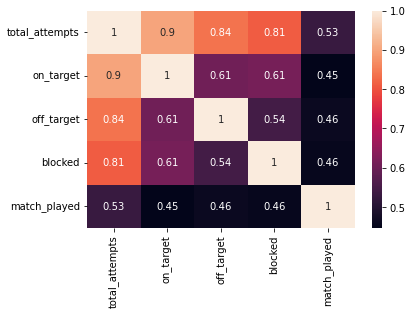

In [119]:
import seaborn as sn
import matplotlib.pyplot as plt

correlation_matrix = uefa_without_serial.corr()
# формируем матрицу корреляций

sn.heatmap(correlation_matrix, annot=True)
plt.show()
# выводим матрицу корреляций в виде heatmap для наглядной визуализации

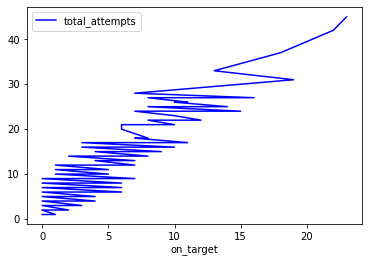

In [132]:
# Построим график on_target от total_attempts, т.е. зависимость забитых голов от числа сделанных попыток
on_target_total_attempts_plot = uefa.plot(
    x='on_target', y='total_attempts', 
    color='blue'
)

Вывод: на основании проведенного анализа можно сказать, что лучшую результативность среди клубов по забитым голам показал Риал Мадрид, лучший игрок - Бензема.
также можно говорить о прямой зависимости между количеством забитых голов и сделанных попыток.